# Hands On Scipy Tutorial 
**Tutors:** Axel Donath

This hands-on tutorial gives an introduction and overview of the [Scipy](http://www.scipy.org/) Python package. It based on the [excellent Scipy tutorial](https://github.com/Asterics2020-Obelics/School2019/blob/master/scipy/scipy_general.ipynb) by Maximilian Noethe and Kai Brügge from the past Asterics software summer school 2019.

## Preface
We recommend to follow this tutorial by **executing the code cells on your local machine**, along with the tutor. Every sub-topic we will cover in this tutorial will be concluded by a few **exercises** with different levels of difficulty** (*easy*, *advanced* and *hard*). The exercises will not be discussed during the course, however we provide a **sample solution** for all exercises in the [solutions folder](astropy_hands_on_solutions.ipynb) you can look at **after the course**. You can always ask for help on the exercises on the corresponding Slack channel **#d05-fri11-scipy**.   

The estimated time for this tutorial is ~1.5 hours. We have marked some of the sections that deal with more advanced topics as "optional". 

We're happy to receive any **feedback or questions** on the tutorial via mail to *axel.donath@mpi-hd.mpg.de* or using the 
repository's [issue tracker](https://github.com/escape2020/school2021/issues). 

![](scipy_logo.png)

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration and ODE  ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each submodule in SciPy  provides a number of functions and classes that can be used to solve problems in their respective domain.


## 0. Setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

rng = np.random.default_rng(42)

## 1. Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

Here we will look at how to use some of these functions:



### 1.1 Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [3]:
from scipy import linalg

In [4]:
A = (np.arange(100) + rng.normal(0, 10, size=(100))).reshape(10, 10)
b = np.arange(10)
A.shape, b.shape

((10, 10), (10,))

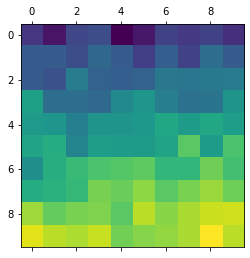

In [5]:
plt.matshow(A)
plt.grid(False) # turn off the grid for this plot

In [6]:
x = linalg.solve(A, b)
x

array([ 0.0298923 ,  0.00868663,  0.0258469 ,  0.01367623,  0.01353663,
        0.02030362, -0.05241789,  0.05267412,  0.01826446, -0.03321952])

In [7]:
# check whether we found the correct x. All entries should be close to zero.
np.dot(A, x) - b

array([ 1.66533454e-16, -1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
        8.88178420e-16,  0.00000000e+00,  0.00000000e+00,  8.88178420e-16,
        0.00000000e+00,  0.00000000e+00])

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:

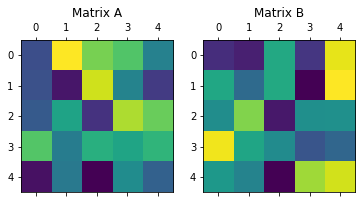

In [8]:
A = rng.uniform(size=(5, 5))
B = rng.uniform(size=(5, 5))
f, [ax1, ax2] = plt.subplots(1, 2)
ax1.matshow(A)
ax2.matshow(B)
ax1.grid(False)
ax2.grid(False)
ax1.set_title("Matrix A")
ax2.set_title("Matrix B");

In [9]:
X = linalg.solve(A, B)
X

array([[ 4.26661683,  0.97303145,  0.21291271,  4.38475543,  3.60122584],
       [-0.52762202, -0.69149307,  0.15805858,  0.11202386,  0.02839992],
       [-1.65294528, -0.62130048,  0.64404986, -2.65960636, -1.57717235],
       [ 4.4992729 ,  1.95322224, -0.05940088,  5.89156964,  6.56577378],
       [-5.3781515 , -0.8935471 , -0.18052208, -7.24626002, -7.87467682]])

In [10]:
# check
linalg.norm(np.dot(A, X) - B)

9.865072098181418e-16

### 1.2 Eigenvalues and eigenvectors

The eigenvalue problem for a matrix $A$:

$\displaystyle A v_n = \lambda_n v_n$

where $v_n$ is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` and for calculating both eigenvalues and eigenvectors, use the function `eig`. Both return complex numbers.

In [11]:
A = rng.uniform(size=(4, 4))

eigen_values = linalg.eigvals(A)
eigen_values

array([ 2.03197191+0.j        ,  0.32055586+0.j        ,
       -0.25719529+0.28106828j, -0.25719529-0.28106828j])

In [12]:
values, vectors = linalg.eig(A)
values, vectors

(array([ 2.03197191+0.j        ,  0.32055586+0.j        ,
        -0.25719529+0.28106828j, -0.25719529-0.28106828j]),
 array([[-0.40772097+0.j        , -0.66263393+0.j        ,
          0.69076099+0.j        ,  0.69076099-0.j        ],
        [-0.59942711+0.j        ,  0.1547345 +0.j        ,
          0.05160407+0.2579825j ,  0.05160407-0.2579825j ],
        [-0.34154935+0.j        ,  0.61135759+0.j        ,
          0.05395196-0.46534462j,  0.05395196+0.46534462j],
        [-0.5981595 +0.j        , -0.40399925+0.j        ,
         -0.45963856+0.15135145j, -0.45963856-0.15135145j]]))

There are also more specialized solvers, like the `eigh` for Hermitian matrices. 

### 1.3 Exercise:  Simple Linear Algebra

1. Create a 10x10 matrix $A$ with random entries

2. Create a symmetric matrix from $A$ using its transpose (use A.T to transpose) and then plot the new matrix using `plt.matshow`

3. Use `linalg.eigh` to get the eigenvalues and vectors.

In [13]:
# %load solutions/simple_linalg_solution.py

# 2. Special Functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

- Airy functions
- Elliptic functions and integrals
- Bessel functions
- Gamma functions
- etc....

## 2.1 Polynomials

The module contains a large number of functions for evaluating polynomials and calculating their roots.

The following plot shows just a few of them.


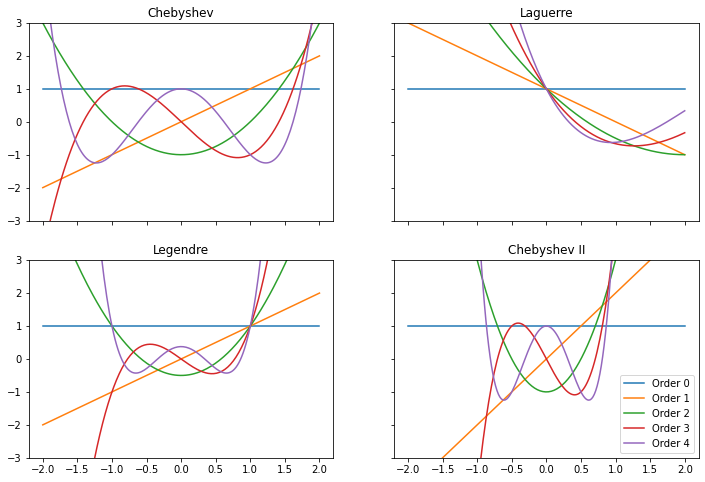

In [14]:
from scipy import special

functions = {
    "Chebyshev": special.eval_chebys,
    "Laguerre": special.eval_laguerre,
    "Legendre": special.eval_legendre,
    "Chebyshev II": special.eval_chebyu
}

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))

x = np.linspace(-2., 2., 200)

for name, ax in zip(functions, axes.flat):
    f = functions[name]
    for n in range(5):
        ax.plot(x, f(n, x), label=f"Order {n}")
    
    ax.set_title(name)
    ax.set_ylim([-3, 3])

plt.legend();

## 2.2 Statistical Functions

The module also contains a host of useful functions for statistical computations. for example the so called 'error function' `scipy.special.erf`

\begin{align}
\operatorname {erf}(x)&={\frac {1}{\sqrt {\pi }}}\int _{-x}^{x}e^{-t^{2}},dt \\ &={\frac {2}{\sqrt {\pi }}}\int _{0}^{x}e^{-t^{2}}\,dt.
\end{align}

Which allows you to get the Gaussian probability distribution
$$
\phi(z) = \frac 1 2 \left(1 + erf\left(\frac{z}{sqrt(2)}\right) \right)
$$

The module `scipy.stats` contains nicer methods to handle statistical methods. More on that later.

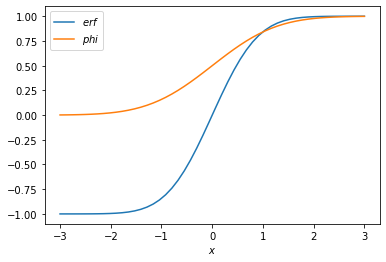

In [15]:
x = np.linspace(-3, 3)
plt.plot(x, special.erf(x), label='$erf$')
plt.plot(x, 0.5 * (1 + special.erf(x / np.sqrt(2))), label='$phi$')
plt.xlabel('$x$')
plt.legend();

## 2.3 Bessel Functions
To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions.
The `scipy.special` module includes a large number of Bessel-functions
Here we will use the functions $j_n$ and $y_n$, which are the Bessel functions 
of the first and second kind and real-valued order.

Bessel functions are a family of solutions to Bessel’s differential equation with real or complex order alpha:
$$
x^2 \frac{d^2 y}{dx^2} +x  \frac{dy}{dx} +(x^2−α^2)y=0
$$

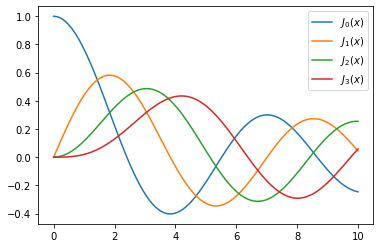

In [16]:
from scipy import special

x = np.linspace(0, 10, 100)

for n in range(4):
    plt.plot(x, special.jn(n, x), label=f'$J_{n}(x)$')

plt.legend();

Among other uses, these functions arise in wave propagation problems such as the vibrational modes of a thin drum head. Here is an example of a circular drum head anchored at the edge. See https://en.wikipedia.org/wiki/Vibrations_of_a_circular_membrane

In [17]:
# fix the radius of the drum
DRUM_RADIUS = 1

def drumhead_height(n, k, radius, theta, t):
    '''Solution to the Drumhead problem with a fixed membrane on the edge of the drum
    See https://en.wikipedia.org/wiki/Vibrations_of_a_circular_membrane
    '''
    kth_zero = special.jn_zeros(n, k)[-1] # fix the drum on the outter edge to be zero.
    return np.cos(t) * np.cos(n * theta) * special.jn(n, radius * kth_zero / DRUM_RADIUS)


# create two coordinate vectors containing all combinations of radius and theta we want to plot
r = np.linspace(0, DRUM_RADIUS, 50)
t = np.linspace(0, 2 * np.pi, 50)
radius, theta = np.meshgrid(r, t) # this creates all combinations we are interested in

x = radius * np.cos(theta)
y = radius * np.sin(theta)

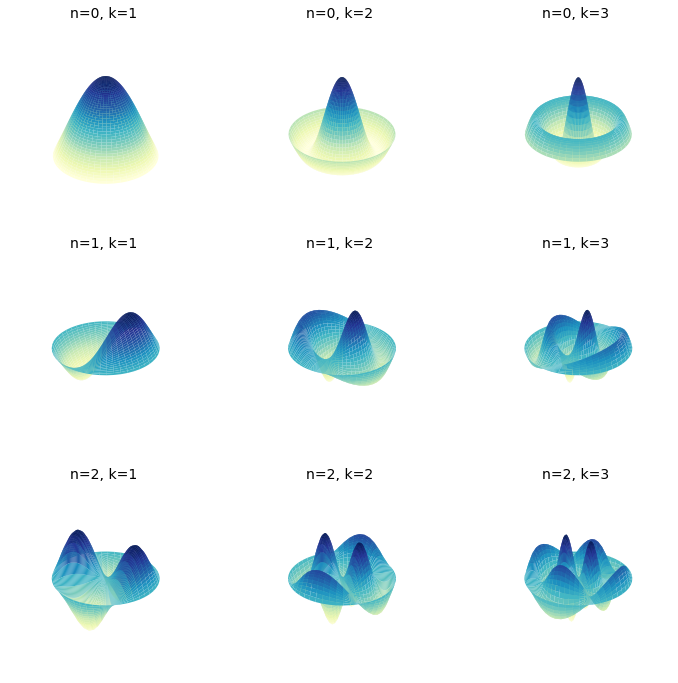

In [18]:
from itertools import product

fig = plt.figure(figsize=(12, 12))

idx = 1

for n in range(3):
    for k in range(1, 4):
        ax = fig.add_subplot(3, 3, idx, projection='3d')
        z = drumhead_height(n=n, k=k, radius=radius, theta=theta, t=0.5)
        ax.plot_surface(x, y, z, cmap='YlGnBu')
        ax.set_title(f"n={n}, k={k}", fontsize=14)
        ax.axis('off')
        idx += 1


In the `scripts` folder you find an example script that creates the following animation: 

In [19]:
from IPython.display import Video
Video('scripts/animation_membrane.mp4')

## 3. Ordinary Differential Equations

### 3.1 Zombie outbreak

To demonstrate the usefulness of SciPy lets try to predict what will happen to humanity in case of a zombie outbreak.  This example comes courtesy of Christopher Campo.

We will show that, in case of a Zombie outbreak, humanity is inevitably doomed. 
As shown by [Phillip Munz et al](http://mysite.science.uottawa.ca/rsmith43/Zombies.pdf) we can model a simple outbreak scenario like so.

\begin{align}
\frac{S}{dt} &= B - \beta S Z - \delta S \\
\frac{Z}{dt} &= \beta S Z + \gamma R - \alpha S Z \\
\frac{R}{dt} &= \delta S + \alpha S Z - \gamma R
\end{align}

Where $S$ is the number of susceptible humans, $Z$ is the number of zombies and $R$ is the number of removed persons which have died either by natural causes or zombie attack. The human birthrate is assumed to be constant and modeled by $B$

Susceptibles can become zombies through an encounter with a zombie ($\beta$). Natural causes of human deaths are parameterized by $\delta$. Humans in the removed class can be resurrected and become zombies ($\gamma$).  
Zombies can enter the removed class by cutting their heads of or removing their brains ($\alpha$)

The question I'm trying to answer is 

> __Can Humanity survive the zombie Apocalypse?__

Since I don't know how to solve differential equations, I'm going to use SciPy instead.


Now we use SciPy to solve this system of differential equations. The function `solve_ivp` does the entire job for us. 

If we go to [the SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) about this function we will read the following.


>This function numerically integrates a system of ordinary differential equations given an initial value:
>
> $y^{\prime} = f(t, y)$
>
>$y(t_0) = y_0$
>
>Here $t$ is a one-dimensional independent variable (time), $y(t)$ is an __n-dimensional vector-valued function__ (state), and an __n-dimensional vector-valued function f(t, y) determines the differential equations__. The goal is to find y(t) approximately satisfying the differential equations, given an initial value y(t0)=y0.


So we start by defining some starting values for the problem and the model function $f(t, y)$.

In [19]:
from scipy.integrate import solve_ivp

# Type `solve_ivp?` to get inline documentation about the method in your notebook.

In [20]:
# fixed model parameters
B = 0.1 # birth rate
delta = 0.0001 # rate of natural casues of death
beta = 0.00016 # transmission coefficent
gamma = 0.0001 # resurrection rate
alpha = 0.0001 # rate of destroyed zombies

# initial conditions
S0 = 5000.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial dead population
y0 = [S0, Z0, R0]     # initial condition vector


def f_model(t, y):
    Si, Zi, Ri = y

    # the model equations (see Munz et al. 2009)
    f0 = B - beta * Si * Zi - delta * Si
    f1 = beta * Si * Zi + gamma * Ri - alpha * Si * Zi
    f2 = delta * Si + alpha * Si * Zi - gamma * Ri
    return [f0, f1, f2]


Now we solve the equation and output the result

In [21]:
t_start, t_end = 0, 150  # 200 days of zombie apocalypse
solution = solve_ivp(f_model, (t_start, t_end), y0, t_eval=np.linspace(t_start, t_end, 200))

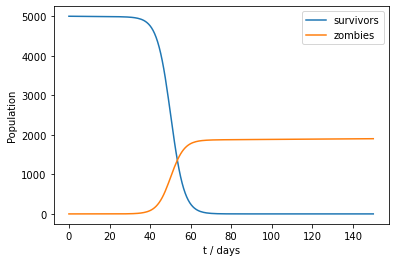

In [22]:
s = solution.y[0, :]
z = solution.y[1, :]
plt.plot(solution.t, s, label='survivors')
plt.plot(solution.t, z, label='zombies')
plt.xlabel('t / days')
plt.ylabel('Population')
plt.legend()

### 3.2 Exercise: Save the world.

The ODE defined above is a very pessimistic model. There is one unstable equilibrium state if $\beta = 0$.
Your task is to save the world by adding a the notion of a _cure_ to the model above. The cure 
can move individuals from the $Z$ to the $S$ group.

1. Introduce a new constant $\rho$ which models the effectivness of the cure. 
2. Add a term to the ODE to model the cure. 
3. Solve the ODE using `solve_ivp`



In [23]:
# %load solutions/solution_zombies.py

A more complex case of coupled differential equations is given again in the `scripts` folder, which creates the following animation:

In [24]:
Video("scripts/animation_pendulum.mp4")

## 4. Numerical Integration

### 4.1 Quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [25]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function.

The basic usage is as follows:

In [26]:
# define a simple function for the integrand
def f(x):
    return x ** 2

integral value=0.33333333333333337 , absolute error=3.700743415417189e-15


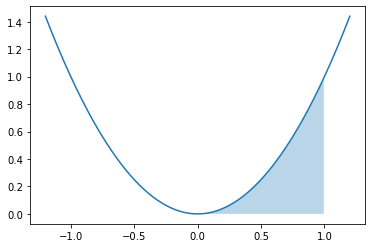

In [27]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(func=f, a=x_lower, b=x_upper)

print(f'integral value={val} , absolute error={abserr}' )

x = np.linspace(-1.2, 1.2, 200)
plt.plot(x, f(x))
plt.fill_between(x, f(x), alpha=0.3, where=(x > 0) & (x < 1))

If we need to pass extra arguments to integrand function we can use the `args` keyword argument:

In [28]:
def integrand(x, n):
    return special.jn(n, x)

x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))
print(val, abserr) 

0.7366751370811073 9.389126882496403e-13


For simple functions we can use a lambda function (name-less function) instead of explicitly defining a function for the integrand:

In [29]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -np.Inf, np.Inf)
print(f'numerical= {val}, {abserr}')
print(f'analytical solution = {np.sqrt(np.pi)}')

numerical= 1.7724538509055159, 1.4202636780944923e-08
analytical solution = 1.7724538509055159


As show in the example above, we can also use 'Inf' or '-Inf' as integral limits.

Higher-dimensional integration works in the same way:

numerical solution= 3.1122703197174726, 1.1493369986559153e-08


<ipython-input-30-d51e848521af>:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


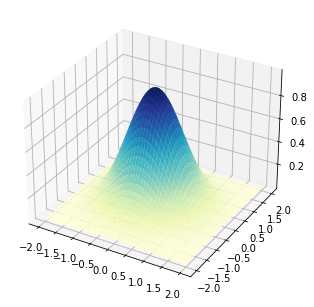

In [30]:
def integrand(x, y):
    return np.exp(-x**2 - y**2)


x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
z = integrand(x, y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, cmap='YlGnBu')

# the integral boundarys can be functions when integrating in more than one dimensions
val, abserr = dblquad(integrand, -2, 2, lambda x: -2, lambda x: 2) 

print(f'numerical solution= {val}, {abserr}')

Note how we had to pass lambda functions for the limits for the y integration, since these in general can be functions of x.

### 4.2 Exercise II:  Integrals and Special Functions

Find the circumference of an ellipse. The formula for calculating circumference $C$ is as follows.

$$
\frac{C}{4a} =  E(\epsilon)=\int _{0}^{\pi /2}{\sqrt {1-\epsilon^{2}\sin ^{2}\theta }}\ d\theta
$$

where $\epsilon$ is the eccentricity of the ellipse given by the length and width of the ellipse.

$$
\epsilon = \sqrt{1 - \frac{b^2}{a^2}}
$$

compare the solution found using `quad` with the appropriate function from the `scipy.special` package.

In [31]:
# %load solutions/solution_2.py

## 5. Signal Processing

SciPy offers a large amount of utilities to handle time series data. However the methods in the `scipy.signal` are useful for much more than just time series data.

### 5.1 Convolution

The convolution of two continuos functions is defined by a simple integral transform.

\begin{aligned}
(f*g)(t)&\,{\stackrel {\mathrm {def} }{=}}\ \int _{-\infty }^{\infty }f(\tau )g(t-\tau )\,d\tau \\&=\int _{-\infty }^{\infty }f(t-\tau )g(\tau )\,d\tau .
\end{aligned}

Convolution happens whenever data gets smeared out by a detector or filter of any kind.


In [32]:
from scipy import signal

# create two rectangular signals
f = np.repeat([0., 1., 0.], 120)
g = np.repeat([0., 1., 0.], 20)

result = signal.convolve(f, g, mode='same')  # same output shape as input, see docs

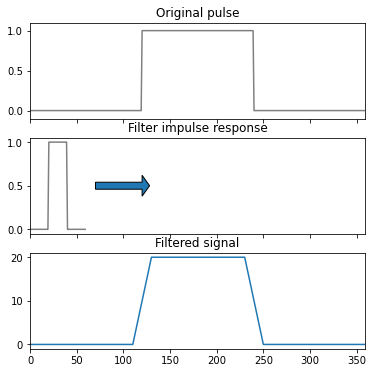

In [33]:
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

ax_orig.plot(f, color='gray')
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)

ax_win.plot(g, color='gray')
ax_win.arrow(70, 0.5, 50.0, 0.0, width=0.08, head_length=8)
ax_win.set_title('Filter impulse response')

ax_filt.plot(result)
ax_filt.set_title('Filtered signal');

The naive algorithm for producing discrete convolutions is not very efficient. It takes $\mathcal{O}(n^2)$ steps to get a result. A more efficient implementation is the FFT based alogrithm. It is based on the *convolution theorem*

> The convolution theorem states that
>
 $$
 \mathcal{F}\{f*g\}=k\cdot {\mathcal {F}}\{f\}\cdot {\mathcal {F}}\{g\}
 $$
>
> where 
> $\mathcal {F}\{f\}$ denotes the Fourier transform of $f$, and $\mathcal {F}\{g\}$ the Fourier transform of $g$.
>
> https://en.wikipedia.org/wiki/Convolution

SciPy uses a heuristic to automagically find the [fastest convolution method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.choose_conv_method.html).

### 5.2 Signal Windows

SciPy conveniently provides a handful of common signal windows ready to be used for convolution or other filtering operations. All of them can be found in `scipy.signal.window` but their are also available in the `scipy.signal` name space.

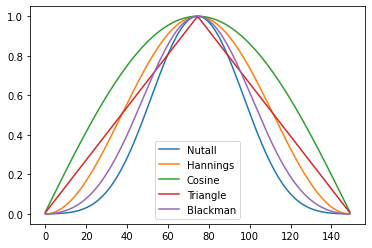

In [34]:
windows = {
    "Nutall": signal.nuttall(150),
    "Hannings": signal.hann(150),
    "Cosine": signal.cosine(150),
    "Triangle": signal.triang(150),
    "Blackman": signal.blackman(150)
}

for name, window in windows.items():
    plt.plot(window, label=name)

plt.legend();

### 5.3 Correlation

The correlation of two functions $f$ and $g$ looks similar to a convolution 

> For continuous functions $f$ and $g$, the cross-correlation is defined as:
> 
$$
(f\star g)(\tau )\ {\stackrel {\mathrm {def} }{=}}\int _{-\infty }^{\infty }f^{*}(t)\ g(t+\tau )\,dt,
$$
> 
> where $f^{*}$ denotes the complex conjugate of  $f$, and $\tau$ is the displacement, also known as lag, although a positive value of $\tau$ actually means that $g(t+\tau)$ leads $f(t)$.

> *https://en.wikipedia.org/wiki/Cross-correlation*

The result of the correlation is a function of the delay $\tau$. This is useful for finding the offset in shifted signals.

In [35]:
offset = 0.25
t = np.linspace(-1, 1, 600)
f = signal.gausspulse(t, fc=3)
g = signal.gausspulse( t + offset, fc=3)

result = signal.correlate(f, g, mode='same')
offset = t[np.argmax(result)]

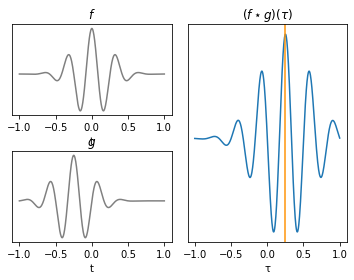

In [36]:
grid = plt.GridSpec(2, 2, wspace=0.1, hspace=0.4, width_ratios=[1, 1])
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[1, 0])
ax3 = plt.subplot(grid[:, 1], )

ax1.plot(t, f, color='gray')
ax1.set_title('$f$')
ax1.set_yticks([])
ax1.set_xlabel('t')

ax2.plot(t, g, color='gray')
ax2.set_title('$g$')
ax2.set_yticks([])
ax2.set_xlabel('t')

ax3.plot(t, result)
ax3.axvline(offset, color='xkcd:tangerine')
ax3.set_title('$(f\star g)(\\tau )$')
ax3.set_yticks([])
ax3.set_xlabel('τ');

### 5.4 Exercise III:  Signal Filtering

If we ever find an alien civilization we will have to communicate with them using binary encoded signals recorded by large radio telescopes.


Assuming the aliens use binary signals with 0s and 1s. 
Given the clock speed and the sample length with which the signal was created. Can you decode the following signal?

The plot below shows the shape of an example signal without any noise containing the message [0, 1 0]

Text(175, 0.5, '0')

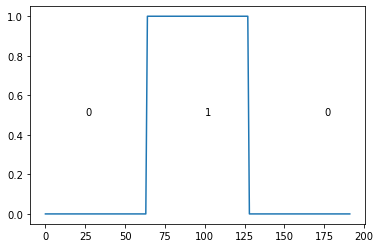

In [37]:
sample_length = 64
plt.plot(np.repeat([0, 1, 0], sample_length))
plt.text(25, 0.5, '0')
plt.text(100, 0.5, '1')
plt.text(175, 0.5, '0')

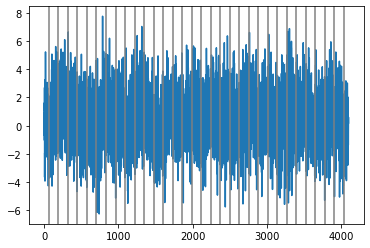

In [38]:
alien_signal = np.loadtxt('data/alien_signal.txt')
sample_length = 128

# let's sample the signal in the middle of each period
clock = np.arange(sample_length // 2, len(alien_signal), sample_length)
plt.plot(alien_signal)

for c in clock:
    plt.axvline(c, color='gray', lw=1.5)

In [39]:
# %load solutions/solution_3.py

### 5.5 Fourier transform

Fourier transforms are one of the universal tools in computational physics, which appear over and over again in different contexts. SciPy provides functions for accessing the classic [FFTPACK](http://www.netlib.org/fftpack/) library, which is an efficient and well tested FFT library written in FORTRAN. The SciPy API has a few additional convenience functions, but overall the API is closely related to the original FORTRAN library.

To use the `fftpack` module in a python program, include it using:

In [40]:
from scipy import fftpack 

To demonstrate how to do a fast Fourier transform with SciPy, we will create some artificial data first.

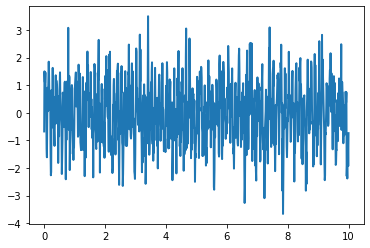

In [41]:
# Number of sample points
n_samples = 1000
length = 10
sample_size = length / n_samples

# sample spacing
x = np.linspace(0.0, length, n_samples)

freqs = [8, 3, 32]
amps = [1, 0.5, 0.25]

y = np.zeros(n_samples)
for a, f in zip(amps, freqs):
    y += a * np.sin(2 * np.pi * f * x)

y += rng.normal(0, 0.75, len(y))
plt.plot(x, y, lw=2)

(0.0, 50.0)

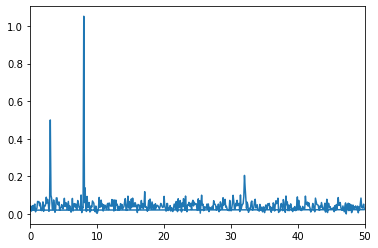

In [42]:
yf = fftpack.fft(y)
xf = fftpack.fftfreq(n_samples, sample_size)
plt.plot(xf, 2.0 / n_samples * np.abs(yf))
plt.xlim(0, 0.5 / sample_size)

As expected, we now see a peaks in the spectrum that match the true frequencies in the signal.

## 6. Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.

Below we instantiate an object modeling a random variable following the normal distribution.

### 6.1 Continuous Distributions

In [43]:
from scipy import stats

mean = 0
sigma = 1
X = stats.norm(loc=mean, scale=sigma)

All distributions in this submodule extend either `scipy.stats.rv_continuous` or `scipy.stats.rv_discrete`.
Below is a list of functions supported by most continuous distribution objects

```
rvs(*args, **kwds) 	Random variates of given type.
pdf(x, *args, **kwds) 	Probability density function at x of the given RV.
logpdf(x, *args, **kwds) 	Log of the probability density function at x of the given RV.
cdf(x, *args, **kwds) 	Cumulative distribution function of the given RV.
logcdf(x, *args, **kwds) 	Log of the cumulative distribution function at x of the given RV.
sf(x, *args, **kwds) 	Survival function (1 - cdf) at x of the given RV.
logsf(x, *args, **kwds) 	Log of the survival function of the given RV.
ppf(q, *args, **kwds) 	Percent point function (inverse of cdf) at q of the given RV.
isf(q, *args, **kwds) 	Inverse survival function (inverse of sf) at q of the given RV.
moment(n, *args, **kwds) 	n-th order non-central moment of distribution.
stats(*args, **kwds) 	Some statistics of the given RV.
entropy(*args, **kwds) 	Differential entropy of the RV.
expect([func, args, loc, scale, lb, ub, …]) 	Calculate expected value of a function with respect to the distribution.
median(*args, **kwds) 	Median of the distribution.
mean(*args, **kwds) 	Mean of the distribution.
std(*args, **kwds) 	Standard deviation of the distribution.
var(*args, **kwds) 	Variance of the distribution.
interval(alpha, *args, **kwds) 	Confidence interval with equal areas around the median.
__call__(*args, **kwds) 	Freeze the distribution for the given arguments.
fit(data, *args, **kwds) 	Return MLEs for shape (if applicable), location, and scale parameters from data.
fit_loc_scale(data, *args) 	Estimate loc and scale parameters from data using 1st and 2nd moments.
nnlf(theta, x) 	Return negative loglikelihood function.

```

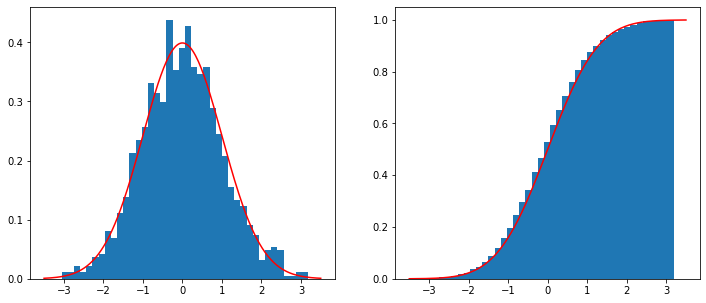

In [44]:
N = 1200
measurements = X.rvs(size=N)
x = np.linspace(-3.5, 3.5, 200)

f, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(measurements, bins=40, density=True)
ax1.plot(x, X.pdf(x), color='red')


ax2.hist(measurements, bins=40, cumulative=True, density=True)
ax2.plot(x, X.cdf(x), color='red');

### 6.2 Discrete Distributions

Discrete functions work in a very similar manner.


```
rvs(*args, **kwargs) 	Random variates of given type.
pmf(k, *args, **kwds) 	Probability mass function at k of the given RV.
logpmf(k, *args, **kwds) 	Log of the probability mass function at k of the given RV.
cdf(k, *args, **kwds) 	Cumulative distribution function of the given RV.
logcdf(k, *args, **kwds) 	Log of the cumulative distribution function at k of the given RV.
sf(k, *args, **kwds) 	Survival function (1 - cdf) at k of the given RV.
logsf(k, *args, **kwds) 	Log of the survival function of the given RV.
ppf(q, *args, **kwds) 	Percent point function (inverse of cdf) at q of the given RV.
isf(q, *args, **kwds) 	Inverse survival function (inverse of sf) at q of the given RV.
moment(n, *args, **kwds) 	n-th order non-central moment of distribution.
stats(*args, **kwds) 	Some statistics of the given RV.
entropy(*args, **kwds) 	Differential entropy of the RV.
expect([func, args, loc, lb, ub, …]) 	Calculate expected value of a function with respect to the distribution for discrete distribution.
median(*args, **kwds) 	Median of the distribution.
mean(*args, **kwds) 	Mean of the distribution.
std(*args, **kwds) 	Standard deviation of the distribution.
var(*args, **kwds) 	Variance of the distribution.
interval(alpha, *args, **kwds) 	Confidence interval with equal areas around the median.
__call__(*args, **kwds) 	Freeze the distribution for the given arguments.
```

In [45]:
# create a (discreet) random variable with poissionian distribution
Y = stats.poisson(3.5) 

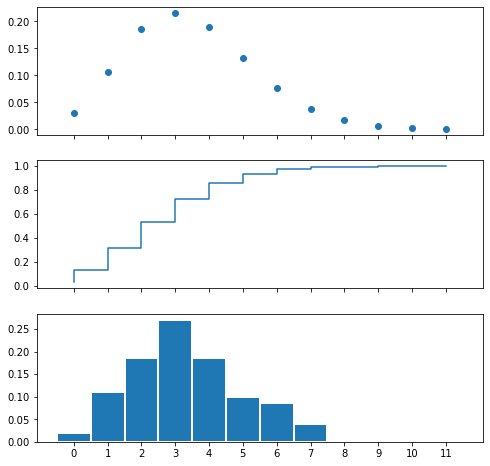

In [46]:
n = np.arange(0, 12)

fig, axes = plt.subplots(3,1, sharex=True, figsize=(8, 8))

# plot the probability mass function (PMF)
axes[0].plot(n, Y.pmf(n), 'o')

# plot the cumulative distribution function (CDF)
axes[1].step(n, Y.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(Y.rvs(size=200), bins=np.arange(13) - 0.5, density=True, lw=2, edgecolor='w');
axes[2].set_xticks(n);

The objects support easy access to some of its statistical properties:

In [47]:
print(X.mean(), X.std(), X.var()) # normal distribution
print(Y.mean(), Y.std(), Y.var()) # poission distribution

0.0 1.0 1.0
3.5 1.8708286933869707 3.5


## 7. Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather complicated. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [48]:
from scipy import optimize

### 7.1 Minimization

Let's first look at how to find the minima of a simple function of a single variable:

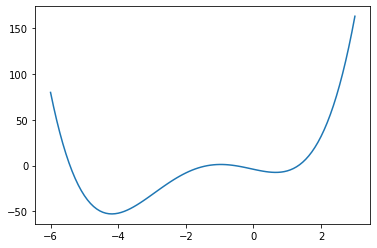

In [49]:
def f(x):
    return 4.5*x**3 + (x-4)**2 + 0.75*x**4 - 20

x = np.linspace(-6, 3, 100)
plt.plot(x, f(x));

We can use the `minimize_scalar` function to find the minima of a scalar function. It provides wrapper around many optimization algorithms you can choose from using the `method` keyword. 

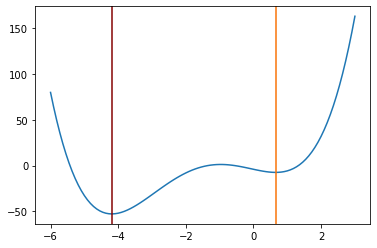

In [50]:
result = optimize.minimize_scalar(f)

plt.plot(x, f(x));
plt.axvline(result.x, color='xkcd:orange')


# add some boundaries
result = optimize.minimize_scalar(f, bracket=[-6, -2])
plt.axvline(result.x, color='xkcd:dark red')

### 7.2 Minimization in More Dimensions.

Below you'll find the infamous *Rosenbrock* function in two dimensions. It's very popular for benchmarking global optimization problems. Its solutions are well known and easily parametrized. 

<ipython-input-51-fc7ef1725bce>:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


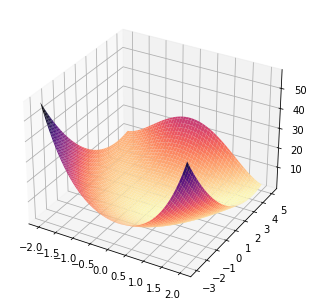

In [51]:
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock_2d(x, y, a=1, b=1):
    return (a - x)**2 + b*(y - x**2)**2


fig = plt.figure()
ax = Axes3D(fig)

x, y = np.meshgrid(np.linspace(-2 ,2, 100), np.linspace(-3. ,5, 100))
ax.plot_surface(x, y, rosenbrock_2d(x, y), cmap='magma_r')

<ipython-input-52-9e575bda5485>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


      fun: 9.782131244560633e-16
 hess_inv: array([[0.49971416, 1.00085437],
       [1.00085437, 2.5026801 ]])
      jac: array([1.93149141e-08, 1.12728646e-08])
  message: 'Optimization terminated successfully.'
     nfev: 57
      nit: 16
     njev: 19
   status: 0
  success: True
        x: array([0.99999997, 0.99999994])

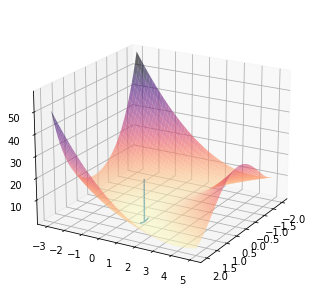

In [52]:
result = optimize.minimize(lambda x: rosenbrock_2d(x[0], x[1]), x0=[5, 2])
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(20, 30)


x, y = np.meshgrid(
    np.linspace(-2 ,2, 100),
    np.linspace(-3. ,5, 100)
)

ax.plot_surface(x, y, rosenbrock_2d(x, y), cmap='magma_r', alpha=0.6)

x, y, z = result.x[0], result.x[1], 20
ax.quiver(x, y, z, 0, 0, -1, length=20, arrow_length_ratio=0.04)

result

### 7.3 Least Squares Minimization

Lets presume a linear weighted combination of variables:

$$
f(x)= \hat{y} =  \hat{\beta}_0 + \sum_{j=1}^p x_j \hat{\beta}_j
$$
where $f:\mathbb{R}^{p} \to \mathbb{R}$.


When we include a 1 as the first entry into our sample $x$ e.g. $x = (1, x_1, x_2, \ldots, x_p)$ we can rewrite
$f$ in matrix form

$$
f(x)= \hat{y} =  x^T \mathbf{\beta}
$$

where $\beta = (\beta_0, \beta_1, \beta_2, \ldots, \beta_p)$.



How do you find those weights? Like before we choose a loss function and try to opimize it.
In this case we choose a loss function called the residual sum of squares (RSS).
We calculate it over all samples $x_i$ in a matrix $\mathbf{X}$.

$$L(\beta) = RSS(\mathbf{\beta}) = \sum_{i=1}^N (y_i - x_i^T \beta)^2 $$

Here $x_i$ is a row in $\mathbf{X}$, hence the transpose.

We can now rewrite the loss function in matrix form:


$$
RSS(\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta )
$$

Now we optimize the loss function just like we would any other function, by differentiating with respect to $\beta$ and setting the result equals to zero.

$$
 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \beta ) \stackrel{!}{=} 0
$$

Solving for $\beta$ leads to

$$
\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$


We just performed  __Linear Least Squares__ regression. Below we fit some noisy a polynomial data.

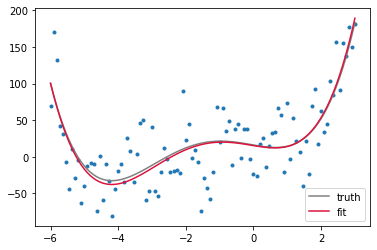

In [53]:
def f(x, beta=[4.5, 1, 0.75]):
    return beta[0]*x**3 + beta[1]*(x-4)**2 + beta[2]*x**4

x = np.linspace(-6, 3, 100)
data = f(x) + rng.normal(0, 35, size=x.shape)

# build the answer matrix
A = np.vstack([x ** 3, (x - 4) ** 2, x ** 4]).T

# find the linear least squares solution for the parameters
result = optimize.lsq_linear(A, data)

plt.plot(x, data, '.')
plt.plot(x, f(x), color='gray', label='truth')
plt.plot(x, f(x, beta=result.x), color='crimson', label='fit')
plt.legend();

### 7.4 Curve Fitting

For more general cases where the parameters are not linear there is the more convenient function `curve_fit`



array([[0.26349427, 0.32096814],
       [0.32096814, 0.43260844]])

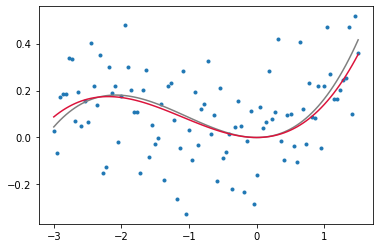

In [54]:
from scipy import stats

def f(x, scale=5, loc=4, ):
    return (1/(scale))**2*x**3 + (1/(2*loc))*x**2

x = np.linspace(-3,  1.5, 100)
data = f(x) + rng.normal(0, 0.15, size=x.shape)

popt, pcov = optimize.curve_fit(f, x, data, p0=[5, 4, ])

plt.plot(x, data, '.')
plt.plot(x, f(x), color='gray', label='truth')
plt.plot(x, f(x, *popt), color='crimson', label='fit')

pcov

### 7.5 Exercise:  Curve Fitting

Use `numpy.loadtxt` to load the file called `munich_temperatures_average.txt` and fit a model to it using `optimize.curve_fit`.



In [55]:
# %load solution_6.py

### 7.6 Root Finding

To find the solution for a function of the form $f(x) = 0$ we can use the `fsolve` or the `root` function. It requires one or more initial guesses: 

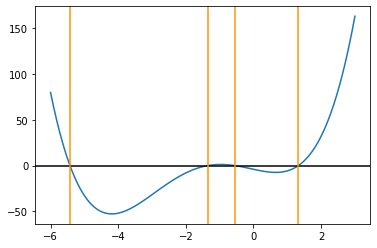

In [56]:
def f(x):
    return 4.5 * x **3 + (x - 4) ** 2 + 0.75 * x ** 4 - 20

x = np.linspace(-6, 3, 100)

plt.plot(x, f(x))
plt.axhline(color='black')

result = optimize.root(f, [-6, -3, 0, 2])

for r in result.x:
    plt.axvline(r, color='xkcd:tangerine')

## 8. Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [57]:
from scipy import interpolate

def f(x):
    return np.sin(x)

In [58]:
n = [0, 1, 2, 3, 3.5, 4, 6, 6.5, 7, 9]
x = np.linspace(0, 9, 100)

y_measured = f(n) 

linear_interpolation = interpolate.interp1d(n, y_measured)

cubic_interpolation = interpolate.interp1d(n, y_measured, kind='cubic')
# this returns a new function we can call for values of x
cubic_interpolation

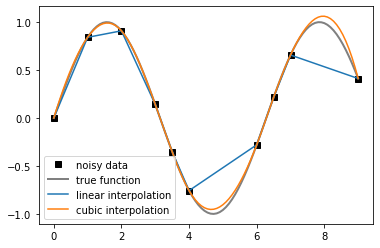

In [59]:
plt.plot(n, y_measured, 's', label='noisy data', color='black')
plt.plot(x, f(x), c='gray', lw=2, label='true function')
plt.plot(x, linear_interpolation(x), label='linear interpolation')
plt.plot(x, cubic_interpolation(x), label='cubic interpolation')
plt.legend();

## 9. SciPy IO Module

## 9.1 Wave files

SciPy provides some useful methods for reading file from MatLab, NetCDF or WAV data. Below is an example which uses the `scipy.io.wavfile` module to write a file containing the sound of hydrogen atoms.



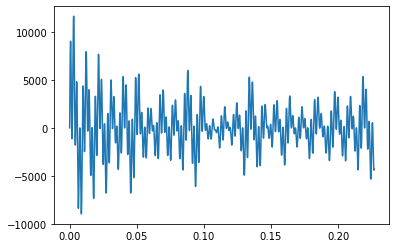

In [60]:
from scipy.io import wavfile
from scipy import signal

rate = 44100 #44.1 khz
duration = 10 # in sec

def rydberg(n, m):
    return (1 / (n ** 2) - 1 / (m ** 2)) 

def lyman(m):
    """Lyman series"""
    return rydberg(1, m)

def balmer(m):
    """Balmer series"""
    return rydberg(2, m)

def sound(frequency, time):
    return 2 ** 12 * np.sin(2 * np.pi * 440 * frequency * time)

t = np.linspace(0, duration, rate * duration)
hydrogen_sound = np.sum(
    [sound(lyman(i), t) + sound(balmer(i), t) for i in range(2, 12)], axis=0) / 6

plt.plot(t[:10000], hydrogen_sound[:10000])

wavfile.write('data/hydrogen.wav', rate, hydrogen_sound.astype(np.int16))

In [61]:
%%HTML
<audio controls="controls" style="width:600px" >
  <source src="hydrogen.wav" type="audio/wav" />
</audio>

### 9.2 Exercise:  Signal Processing and IO.

Load the file `synth_sound.wav` and plot a the frequency spectrum vs time.

In [62]:
# %load solution_4.py